In [1]:
import xgi
import random
import numpy as np

In [2]:
def SIS(H, beta, gamma, tmax):
    n = H.num_nodes
    num_seeds = 10
    # susceptible is 0, infected is 1
    X = np.zeros((tmax, n))
    X[0, random.sample(range(n), num_seeds)] = 1

    members = H.edges.members(dtype=dict)
    memberships = H.nodes.memberships()
    for t in range(tmax-1):
        # loop over all the nodes
        X[t+1] = X[t]
        for i in range(n):
            # infection
            if X[t, i] == 0:
                for e in memberships[i]:
                    # majority vote
                    edge = list(members[e])
                    if X[t, edge].sum() / len(edge) > 0.5 and random.random() < beta:
                        X[t+1, i] = 1
                        break

            # healing
            if X[t, i] == 1 and random.random() < gamma:
                X[t+1, i] = 0
    return np.arange(tmax), X

def SIR(H, beta, gamma, tmax):
    n = H.num_nodes
    num_seeds = 10
    # susceptible is 0, infected is 1
    X = np.zeros((tmax, n))
    X[0, random.sample(range(n), num_seeds)] = 1

    members = H.edges.members(dtype=dict)
    memberships = H.nodes.memberships()

    t = 0
    while t < tmax-1 and sum(X[t] == 1) > 0:
        # loop over all the nodes
        X[t+1] = X[t]
        for i in range(n):
            # infection
            if X[t, i] == 0:
                for e in memberships[i]:
                    # majority vote
                    edge = list(members[e])
                    if X[t, edge].sum() / len(edge) > 0.5 and random.random() < beta:
                        X[t+1, i] = 1
                        break

            # healing
            if X[t, i] == 1 and random.random() < gamma:
                X[t+1, i] = 2
            
        t += 1
    return np.arange(tmax), X

In [3]:
n = 100
H = xgi.fast_random_hypergraph(n, [0.07, 0.05])

In [4]:
# t, X = SIS(H, 0.005, 0.1, 50)
t, X = SIR(H, 0.005, 0.1, 50)

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Node state')

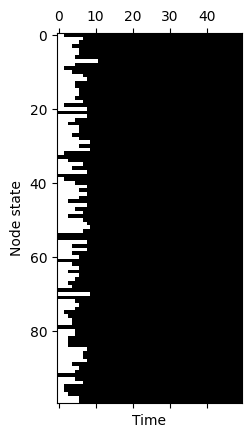

In [6]:
plt.spy(X.T)
plt.xlabel("Time")
plt.ylabel("Node state")

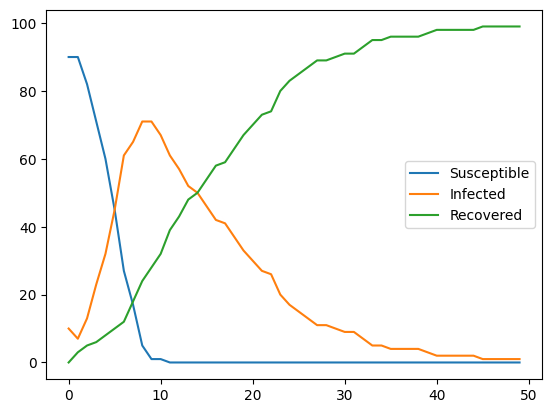

In [7]:
plt.plot((X==0).sum(axis=1), label="Susceptible")
plt.plot((X==1).sum(axis=1), label="Infected")
plt.plot((X==2).sum(axis=1), label="Recovered")

plt.legend()

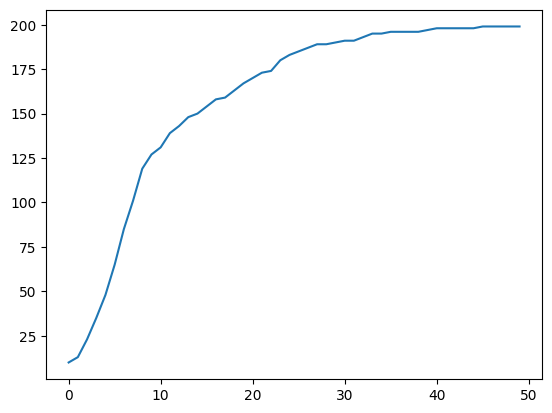

In [8]:
plt.plot(X.sum(axis=1))

In [9]:
n = 100
H = xgi.fast_random_hypergraph(n, [0.05, 0.001], seed=None)
omega = 2 * np.random.normal(1, 0.05, n)
theta = np.linspace(0, 2 * np.pi, n)
timesteps = 500
dt = 0.01

theta, t = xgi.simulate_kuramoto(
    H, k2=2, k3=3, omega=omega, theta=theta, timesteps=timesteps, dt=dt
)
R = xgi.compute_kuramoto_order_parameter(theta)

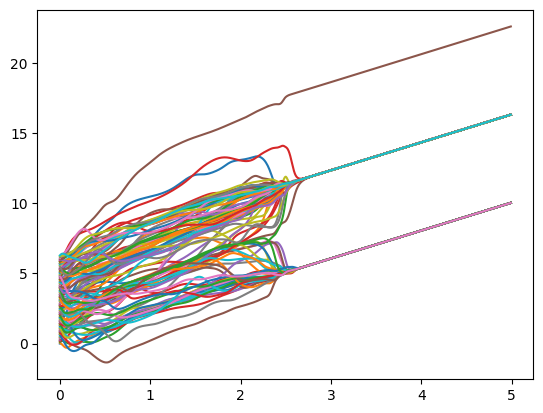

In [10]:
plt.plot(t, theta)
plt.show()

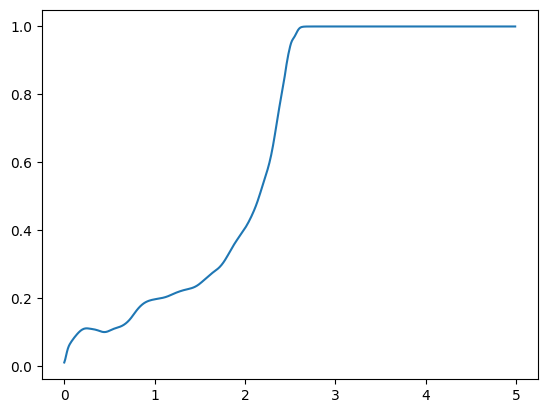

In [11]:
plt.plot(t, R)